In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from insight_datachallenges.week2 import DATADIR

Overall approach
------
I was provided with a chart showing user engagement over calendar time, as well as server log data on each user. I noticed right away that user engagement dropped at the end of July. Is this drop significant? And, what could be the reason for it?

Conclusion
------------
Vacation time in Europe is the likely cause of the decrease in user engagement.

In [2]:
events_csv_filename = os.path.join(DATADIR, 'yammer_events.csv')
events = pd.read_csv(events_csv_filename)

I wasn't sure whether user engagement events were logged by user's local time or a time of day at the server's location. To infer this, I plotted the number of users signing up for Yammer as a function of time of day. If events were logged user-local time, I'd expect them to be distributed during typical waking hours. (This assumes a uniform distribution of users across the world).

In [3]:
events['occurred_at'] = pd.to_datetime(events['occurred_at'])
events['occurred_at_date'] = events['occurred_at'].apply(lambda x: x.date())
events['time_of_day'] = events['occurred_at'].apply(lambda x: x.hour)

In [4]:
engagement_mask = events['event_type'] == 'signup_flow'

In [5]:
event_time_groupby = events.loc[engagement_mask, :].groupby(['time_of_day'])

In [6]:
# a peek a the data (sanity check)
events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,occurred_at_date,time_of_day
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,11
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,11
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,11
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,11
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,11


From the plot below, it's clear sign ups occur during normal waking hours, so the `occurred_at` column is indeed user local time.

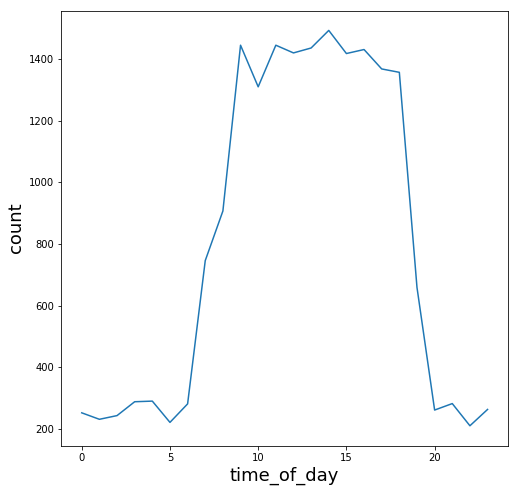

In [7]:
counts_time_of_day = event_time_groupby.agg('count')
# df = counts_time_of_day.unstack(level=0)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_ylabel('count', fontsize=18)
ax.set_xlabel('time of day (24 hour scale)', fontsize=18)
counts_time_of_day.loc[:, 'user_id'].plot(ax=ax)

Let's just confirm the assumption that users are evenly distributed around the world. Below I've printed out the number of user events for each country.

In [8]:
location_groupby = events.groupby('location')
location_groupby.agg('count')['user_id']

location
Argentina                1717
Australia                7494
Austria                  2494
Belgium                  2822
Brazil                  11240
Canada                   9126
Chile                    1092
Colombia                 1945
Denmark                  2191
Egypt                    2258
Finland                  1926
France                  17364
Germany                 23524
Greece                    989
Hong Kong                1525
India                    9620
Indonesia                6224
Iran                     3122
Iraq                     1400
Ireland                  1073
Israel                   2130
Italy                   11790
Japan                   26046
Korea                    7180
Malaysia                 2529
Mexico                   9106
Netherlands              4494
Nigeria                  1642
Norway                   2020
Pakistan                 1035
Philippines              1373
Poland                   3803
Portugal                 1336
R

It looks like most users are from Europe, which suggests the end-of-July drop in engagement is due to Europeans going on holiday the month of August.